In [34]:
import numpy as np
import pandas as pd
import visuals as vs

%matplotlib inline

data = pd.read_csv('housing.csv')
data.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [35]:
y = data['MEDV']
X = data.drop(['MEDV'], axis = 1)

print('The data has {0} data point and {1} variables'.format(*data.shape))

The data has 489 data point and 4 variables


In [36]:
prices = y
features = X

In [37]:
print('Min price {:,.2f}'.format(np.min(prices)))
print('Max price {:,.2f}'.format(np.max(prices)))
print('Mean price {:,.2f}'.format(np.mean(prices)))
print('Median price {:,.2f}'.format(np.median(prices)))
print('Std price {:,.2f}'.format(np.std(prices)))
print('1st quartile of price {:,.2f}'.format(np.percentile(prices,25)))
print('2nd quartile of price {:,.2f}'.format(np.percentile(prices,75)))


Min price 105,000.00
Max price 1,024,800.00
Mean price 454,342.94
Median price 438,900.00
Std price 165,171.13
1st quartile of price 350,700.00
2nd quartile of price 518,700.00


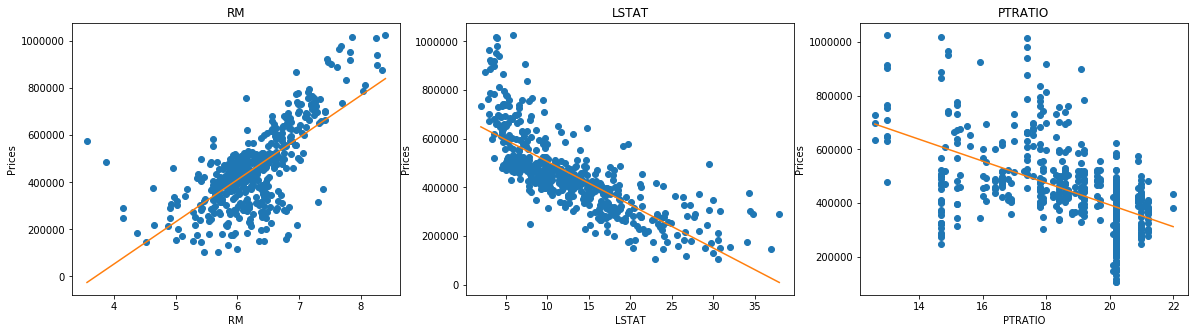

In [38]:
import matplotlib.pyplot as plt
plt.figure(figsize = (20,5))

for i,c in enumerate(features.columns):
    plt.subplot(1,3,i+1)
    x=features[c]
    y=prices
    plt.plot(x,y,'o')
    
    # will plot regression line
    x_1 = np.unique(x)     # Find all unique points on x axis which we want to plot
    a= np.polyfit(x,y,1)   # Find the value of the cofficient for a line with least square error value
    p= np.poly1d(a)        # Find the polynomial equation for the same
    y_1= p(np.unique(x))   # Find the value of y for a given x using polynomial equation
    
    plt.plot(x_1,y_1)
    plt.title(c)
    plt.xlabel(c)
    plt.ylabel('Prices')

In [39]:
# Import r2_score as a performance metric for this example. It exaplained the goodness of fit
from sklearn.metrics import r2_score

def performance_metric(y_true, y_pred):
    return r2_score(y_true, y_pred)

In [40]:
# Lets see how our performance metric work on our perdeifned values
# Lets say we have a model which gives us y_true and y_pred as follows:
y_true = [3.0, -0.5, 2.0, 7.0, 4.2]
y_pred = [2.5, 0.0, 2.1, 7.8, 5.3]
print('Model r2_score on the basis on y_true and y_pred: {:.3f}'.format(performance_metric(y_true, y_pred)))

Model r2_score on the basis on y_true and y_pred: 0.923


In [41]:
# Now we will implement the shuffle and split though train_test_split
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size = 0.2, random_state =10)

#check the split is correct
print(features.shape[0]) # number of rows in features
print(features.shape[1]) # number of columns in features
print(float(X_train.shape[0])/float(features.shape[0]))
print(float(X_test.shape[0])/float(features.shape[0]))

489
3
0.7995910020449898
0.20040899795501022


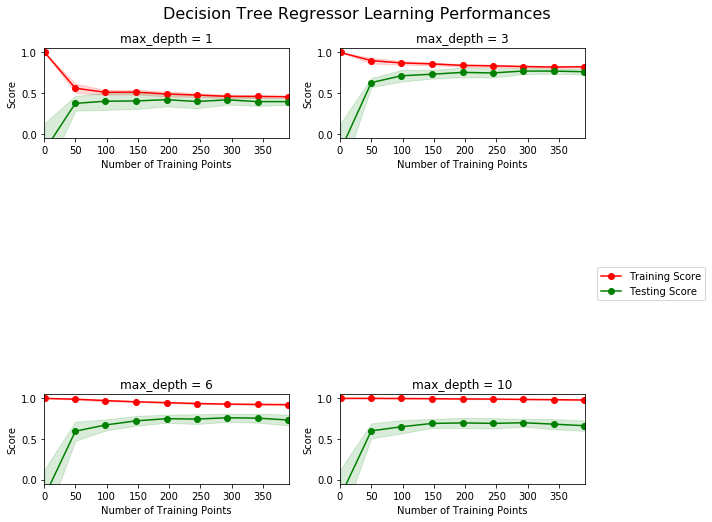

In [42]:
# Lets check learning curves for diffferent max_depth
vs.ModelLearning(features, prices)

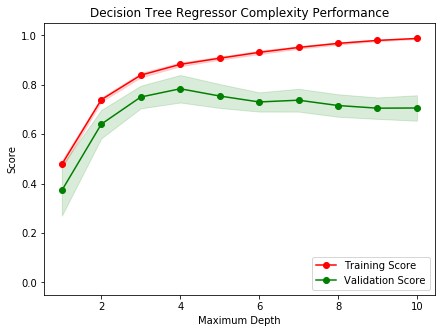

In [44]:
# Lets see the model complexity curve on a range 1 yo 10 values of max_depth
vs.ModelComplexity(X_train, y_train)

In [58]:
# Lets create a function to fit a model using Grid Search for Decision Tree

from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import ShuffleSplit

def fit_model(X,y):
    cvs = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)
    reg = DecisionTreeClassifier(random_state = 0)
    max_de = list(range(1,11))
    parameters = dict(max_depth = max_de)
    scor = make_scorer(performance_metric)
    grid_obj = GridSearchCV(reg, parameters, cv = cvs, scoring = scor)
    grid= grid_obj.fit(X,y)
    return grid.best_estimator_


In [59]:
model = fit_model(X_train, y_train)
print(model.get_params())

{'class_weight': None, 'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': 0, 'splitter': 'best'}


In [65]:
# Prediction percentage is to low so our model is not good. We can improve it including more features and having different algorithm
y_pred = model.predict(X_test)
print(performance_metric(y_test, y_pred))# 67%

0.6703003113918184


In [66]:
# tested on different client data
c_data = [[5, 17, 15], [4, 32, 22], [8, 3, 12]]
for i,price in enumerate(model.predict(c_data)):
    print('client: {} is {}'.format(i, price))

client: 0 is 455700.0
client: 1 is 155400.0
client: 2 is 697200.0


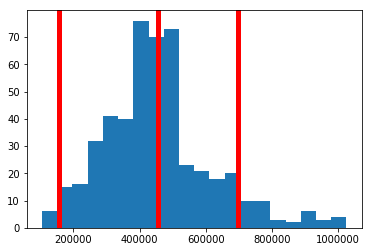

In [67]:
# Plot the graph of our model prediction
plt.hist(prices, bins = 20)
for i,price in enumerate(model.predict(c_data)):
    plt.axvline(price, lw = 5, c = 'r')